In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

import re

with open('../data/article.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    words = re.sub("[^a-zA-Z ]+", "", data)
    tokens = word_tokenize(words)

print(tokens)

['Nature', 'needs', 'chaos', 'it', 'needs', 'randomness', 'says', 'Lee', 'Schofield', 'from', 'the', 'RSPB', 'He', 'is', 'sitting', 'on', 'the', 'bank', 'of', 'Swindale', 'Beck', 'a', 'stretch', 'of', 'river', 'close', 'to', 'Haweswater', 'Reservoir', 'in', 'Cumbria', 'one', 'of', 'Englands', 'largest', 'lakes', 'The', 'chaos', 'and', 'the', 'nature', 'has', 'returned', 'to', 'this', 'site', 'after', 'being', 'missing', 'for', 'two', 'centuries', 'This', 'is', 'because', 'about', 'years', 'ago', 'the', 'community', 'of', 'Swindale', 'embarked', 'on', 'an', 'ambitious', 'project', 'to', 'straighten', 'this', 'section', 'of', 'the', 'beck', 'with', 'the', 'aim', 'of', 'speeding', 'the', 'flow', 'of', 'water', 'through', 'the', 'valley', 'and', 'increasing', 'the', 'amount', 'of', 'farmland', 'surrounding', 'it', 'That', 'had', 'unintended', 'consequences', 'The', 'fasterflowing', 'water', 'was', 'too', 'swift', 'for', 'fish', 'like', 'salmon', 'and', 'trout', 'to', 'spawn', 'And', 'the',

In [3]:
stop_words = set(stopwords.words('english'))
stop_words.add('say')
stop_words.add('says')
stop_words.add('said')

filtered = [w for w in tokens if not w.lower() in stop_words]

print(filtered)

['Nature', 'needs', 'chaos', 'needs', 'randomness', 'Lee', 'Schofield', 'RSPB', 'sitting', 'bank', 'Swindale', 'Beck', 'stretch', 'river', 'close', 'Haweswater', 'Reservoir', 'Cumbria', 'one', 'Englands', 'largest', 'lakes', 'chaos', 'nature', 'returned', 'site', 'missing', 'two', 'centuries', 'years', 'ago', 'community', 'Swindale', 'embarked', 'ambitious', 'project', 'straighten', 'section', 'beck', 'aim', 'speeding', 'flow', 'water', 'valley', 'increasing', 'amount', 'farmland', 'surrounding', 'unintended', 'consequences', 'fasterflowing', 'water', 'swift', 'fish', 'like', 'salmon', 'trout', 'spawn', 'river', 'carried', 'sediment', 'downstream', 'making', 'murkier', 'back', 'RSPB', 'partners', 'including', 'water', 'company', 'owns', 'land', 'embarked', 'remeandering', 'rewiggling', 'project', 'studying', 'valley', 'locate', 'original', 'path', 'carved', 'river', 'charity', 'enlisted', 'team', 'diggers', 'recreate', 'curvy', 'channel', 'yards', 'longer', 'straight', 'line', 'valley'

In [4]:
lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print(lemmatized)

['Nature', 'need', 'chaos', 'need', 'randomness', 'Lee', 'Schofield', 'RSPB', 'sitting', 'bank', 'Swindale', 'Beck', 'stretch', 'river', 'close', 'Haweswater', 'Reservoir', 'Cumbria', 'one', 'Englands', 'largest', 'lake', 'chaos', 'nature', 'returned', 'site', 'missing', 'two', 'century', 'year', 'ago', 'community', 'Swindale', 'embarked', 'ambitious', 'project', 'straighten', 'section', 'beck', 'aim', 'speeding', 'flow', 'water', 'valley', 'increasing', 'amount', 'farmland', 'surrounding', 'unintended', 'consequence', 'fasterflowing', 'water', 'swift', 'fish', 'like', 'salmon', 'trout', 'spawn', 'river', 'carried', 'sediment', 'downstream', 'making', 'murkier', 'back', 'RSPB', 'partner', 'including', 'water', 'company', 'owns', 'land', 'embarked', 'remeandering', 'rewiggling', 'project', 'studying', 'valley', 'locate', 'original', 'path', 'carved', 'river', 'charity', 'enlisted', 'team', 'digger', 'recreate', 'curvy', 'channel', 'yard', 'longer', 'straight', 'line', 'valley', 'bottom'

In [5]:
print("Word count: " + str(len(lemmatized)))

Word count: 390


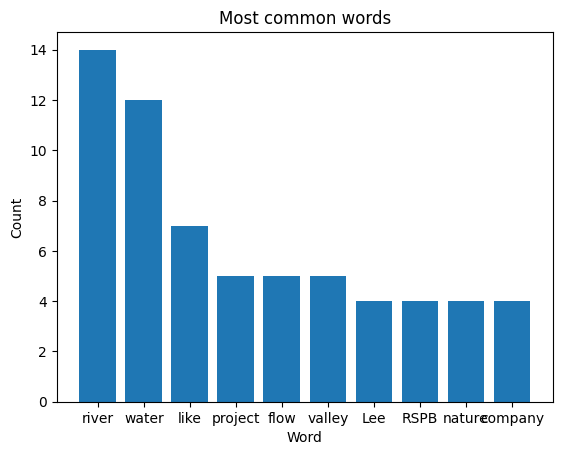

In [6]:
word_counts = Counter(lemmatized)

top_words = word_counts.most_common(10)

words_list = [x[0] for x in top_words]
counts_list = [x[1] for x in top_words]

plt.bar(words_list, counts_list)
plt.title('Most common words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

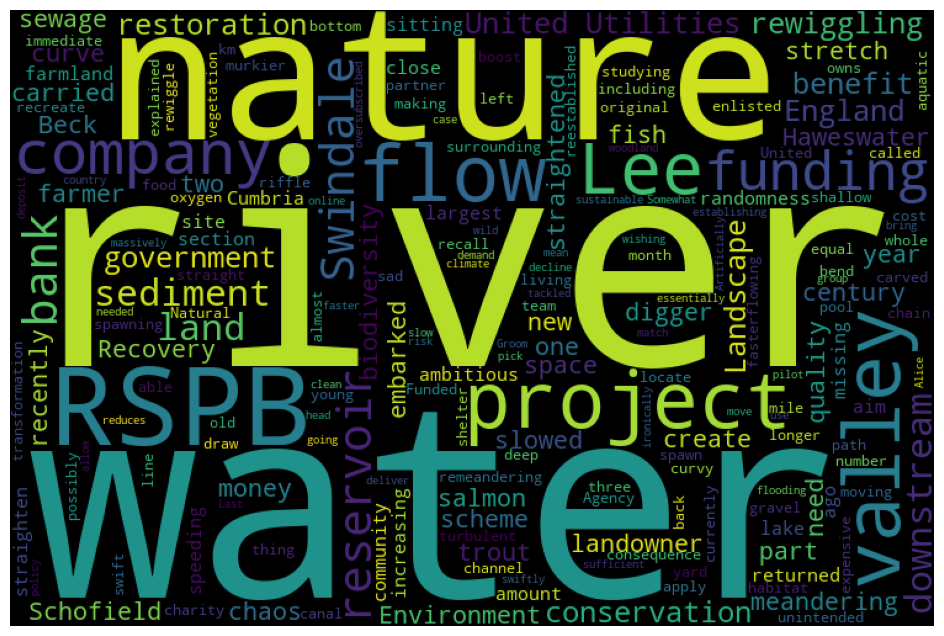

In [7]:
bigstring = (" ").join(lemmatized)

wordcloud = WordCloud(width = 750, height = 500).generate(bigstring)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()